In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [3]:
X, y = load_iris(return_X_y=True, as_frame=True)
df_raw = X
df_raw["target"] = y
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [18]:
# Problemas con el data set: los espacios en los nombres, los paréntesis y target siempre debe estar primero
# Entonces tenemos que hacer el preprocesamiento
# A mano
df_interim = df_raw.copy()
df_interim.columns = ["sepal_length_cm", "sepal_width_cm", "petal_length_cm", "petal:widthn_cm", "target"]
df = df_interim[['target']].copy()
df = pd.concat([df, df_interim.drop(['target'], axis=1)], axis=1)
df["target"]= df["target"].astype("category")
df

,target,sepal_length_cm,sepal_width_cm,petal_length_cm,petal:widthn_cm
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,2,6.7,3.0,5.2,2.3
146,2,6.3,2.5,5.0,1.9
147,2,6.5,3.0,5.2,2.0
148,2,6.2,3.4,5.4,2.3


In [19]:

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df["target"], random_state=2024)


In [20]:
# EDA
display(df_train.describe(include= 'number').T)
display(df_train.describe(include= 'category').T)

,count,mean,std,min,25%,50%,75%,max
sepal_length_cm,120.0,5.852500,0.807420,4.3,5.1,5.80,6.4,7.7
sepal_width_cm,120.0,3.084167,0.428206,2.0,2.8,3.00,3.4,4.4
petal_length_cm,120.0,3.775000,1.750642,1.0,1.6,4.35,5.1,6.9
petal:widthn_cm,120.0,1.214167,0.766888,0.1,0.3,1.30,1.8,2.5


,count,unique,top,freq
target,120,3,0,40


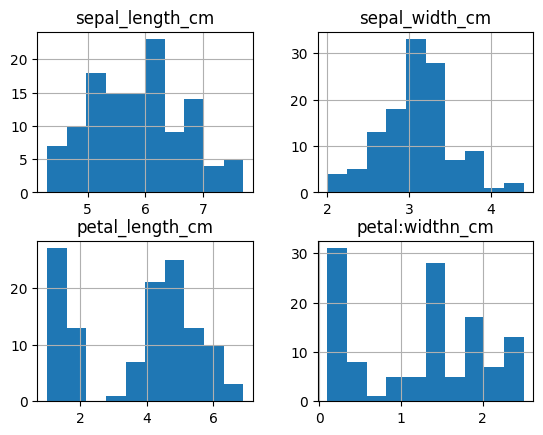

In [21]:
# Análisis univariado
df_train.hist()
plt.show()

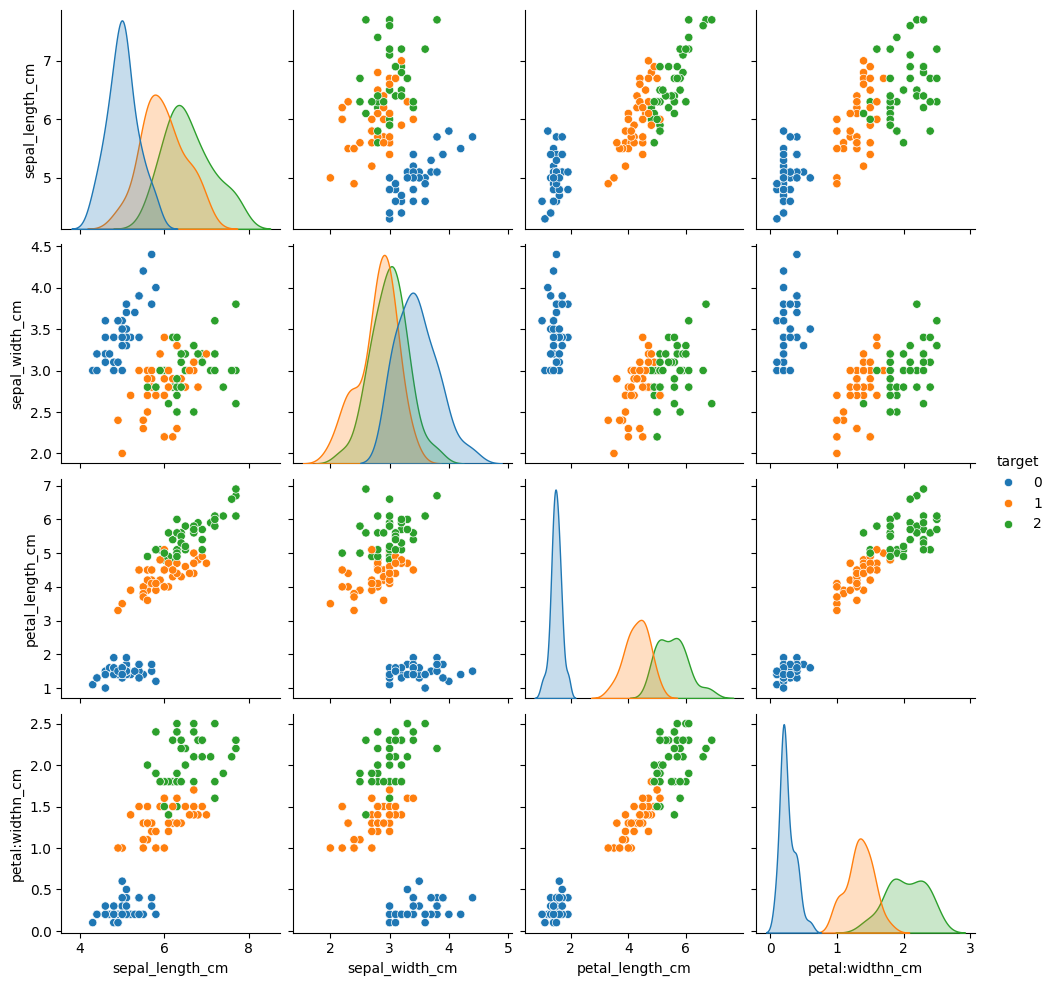

In [22]:
# Análisis bivariado
sns.pairplot(data=df_train, hue="target")
plt.show()

In [23]:
# Para ver la correlación
df_train.select_dtypes("number").corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal:widthn_cm
sepal_length_cm,1.000000,-0.188129,0.875812,0.831525
sepal_width_cm,-0.188129,1.000000,-0.468771,-0.375482
petal_length_cm,0.875812,-0.468771,1.000000,0.963192
petal:widthn_cm,0.831525,-0.375482,0.963192,1.000000


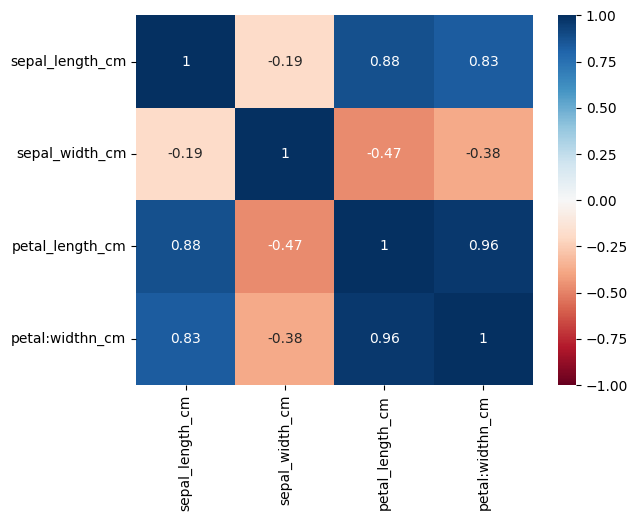

In [24]:
# Mapa de calor de la correlación
sns.heatmap(df_train.select_dtypes("number").corr(),vmin=-1, vmax=1, annot=True, cmap="RdBu") # Correlación
plt.show()

In [25]:
# Modelo Naive Bayes
X_train= df_train.drop("target", axis=1).reset_index(drop=True) # Tengo que separar los valores independientes de la variable dependiente
y_train= df_train["target"].reset_index(drop=True) 
X_test= df_test.drop("target", axis=1).reset_index(drop=True) # Tengo que separar los valores independientes de la variable dependiente
y_test= df_test["target"].reset_index(drop=True) 

In [26]:
# Modelo
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

GaussianNB()

In [29]:
# Hacemos la predicción y medimos su accuracy
y_pred = clf_nb.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.97


In [30]:
from sklearn.datasets import load_wine

In [33]:
x , y = load_wine(return_X_y=True, as_frame=True)
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64